**Description:** The project focuses on developing and evaluating dynamic pricing models for retail. It compares traditional statistical methods like ARIMA with ensemble learning techniques, such as Random Forests. 

**Research Problem:** Traditional models often struggle with complex data patterns and large datasets. The problem is to determine whether advanced ensemble learning techniques can outperform traditional time-series models in predicting optimal prices.

### Strategies for Dynamic Pricing:
1. **Rule-Based Pricing:** Setting prices based on predefined rules like competitor prices, stock levels, or markdown schedules. Works well as a baseline for both model types.
2. **Demand Forecasting:** Predicting future demand to adjust prices dynamically, commonly used in time-series models.
3. **Elasticity-Based Pricing:** Adjusting prices based on the estimated price elasticity of demand, often implemented using ensemble models for non-linear relationships.
4. **Optimization-Based Pricing:** Using optimization algorithms to maximize revenue or profit by integrating model predictions with constraints like inventory and competitor prices.
5. **Context-Aware Pricing:** Leveraging additional factors like seasonality, promotions, or customer behavior, often better captured by ensemble models due to their feature flexibility.

### Differences in Strategies:
1. **Time-Series Models:** Focus on temporal patterns and demand forecasting, relying heavily on historical sales and seasonality trends.
2. **Ensemble Models:** Incorporate broader feature sets (e.g., competitor prices, customer ratings) and excel in capturing complex, non-linear relationships, making them suitable for context-aware and elasticity-based pricing.

### Data Understanding
This dataset provides synthetic yet realistic data for analyzing and forecasting retail store inventory demand. It contains over 73000 rows of daily data across multiple stores and products, including attributes like sales, inventory levels, pricing, weather, promotions, and holidays.

1. Date: Daily records from [start_date] to [end_date].
2. Store ID & Product ID: Unique identifiers for stores and products.
3. Category: Product categories like Electronics, Clothing, Groceries, etc.
4. Region: Geographic region of the store.
5. Inventory Level: Stock available at the beginning of the day.
6. Units Sold: Units sold during the day.
7. Demand Forecast: Predicted demand based on past trends.
8. Weather Condition: Daily weather impacting sales.
9. Holiday/Promotion: Indicators for holidays or promotions.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("Datasets/retail_store_inventory.csv")

In [4]:
dataset.head(2)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

### Exploratory Data Analysis

In [6]:
dataset.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [7]:
# Dealing with outliers
dataset.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [8]:
dataset.isna().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

#### How does the daily/weekly/monthly sales volume correlate with price changes?

In [9]:
# Assuming your dataset is a DataFrame called 'dataset'
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [16]:
# Extracting day, week, and month from the 'Date' column
dataset['Day'] = dataset['Date'].dt.day
dataset['Week'] = dataset['Date'].dt.isocalendar().week
dataset['Month'] = dataset['Date'].dt.month
dataset['year'] = dataset['Date'].dt.year  # Year might be useful for seasonal trends

In [20]:
# Aggregate sales volume and price changes
daily_sales = dataset.groupby('Date').agg({'Units Sold': 'sum', 'Price': 'mean'}).reset_index()
weekly_sales = dataset.groupby(['year', 'Week']).agg({'Units Sold': 'sum', 'Price': 'mean'}).reset_index()
monthly_sales = dataset.groupby(['year', 'Month']).agg({'Units Sold': 'sum', 'Price': 'mean'}).reset_index()
yearly_sales = dataset.groupby(['year']).agg({'Units Sold': 'sum', 'Price': 'mean'}).reset_index()

In [21]:
# Calculate correlation for daily, weekly, and monthly sales with price
daily_corr = daily_sales[['Units Sold', 'Price']].corr()
weekly_corr = weekly_sales[['Units Sold', 'Price']].corr()
monthly_corr = monthly_sales[['Units Sold', 'Price']].corr()
yearly_corr = yearly_sales[['Units Sold', 'Price']].corr()

# Display correlation results
print("Daily Sales and Price Correlation:\n", daily_corr)
print("Weekly Sales and Price Correlation:\n", weekly_corr)
print("Monthly Sales and Price Correlation:\n", monthly_corr)
print("Monthly Sales and Price Correlation:\n", yearly_corr)

Daily Sales and Price Correlation:
             Units Sold     Price
Units Sold    1.000000  0.000177
Price         0.000177  1.000000
Weekly Sales and Price Correlation:
             Units Sold     Price
Units Sold    1.000000  0.182549
Price         0.182549  1.000000
Monthly Sales and Price Correlation:
             Units Sold     Price
Units Sold    1.000000  0.524663
Price         0.524663  1.000000
Monthly Sales and Price Correlation:
             Units Sold     Price
Units Sold    1.000000  0.991544
Price         0.991544  1.000000


1. **Daily (0.00017):** Virtually no correlation, suggesting daily price changes have minimal impact on daily sales.
2. **Weekly (0.1825):** Weak positive correlation, implying slight sensitivity of weekly sales to price changes.
3. **Monthly (0.5246):** Moderate positive correlation, indicating that over longer periods, price changes more significantly affect sales volume.
4. **Yearly Correlation (0.991):** Yes, the strong positive correlation indicates that over longer periods, yearly price changes significantly affect sales volume.

#### What are the average prices and sales volumes during different promotional periods?

In [25]:
# Group by the 'Holiday/Promotion' feature
promo_analysis = dataset.groupby('Holiday/Promotion').agg({
    'Price': 'mean',
    'Units Sold': 'mean'
}).reset_index()
promo_analysis.columns = ['Holiday/Promotion', 'Average Price', 'Average Units Sold']

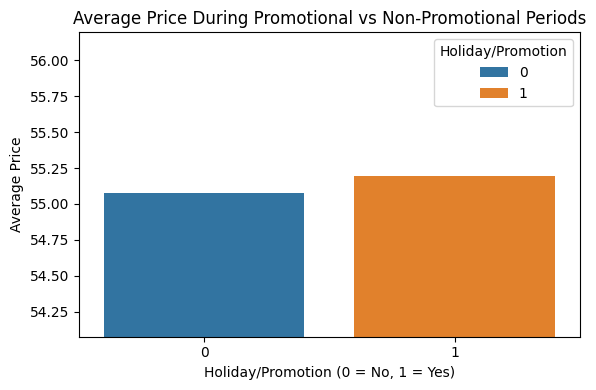

In [35]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Holiday/Promotion', y='Average Price', data=promo_analysis, hue='Holiday/Promotion')
plt.title('Average Price During Promotional vs Non-Promotional Periods')
plt.xlabel('Holiday/Promotion (0 = No, 1 = Yes)')
plt.ylabel('Average Price')
plt.ylim(promo_analysis['Average Price'].min() - 1, promo_analysis['Average Price'].max() + 1)
plt.tight_layout()
plt.show()

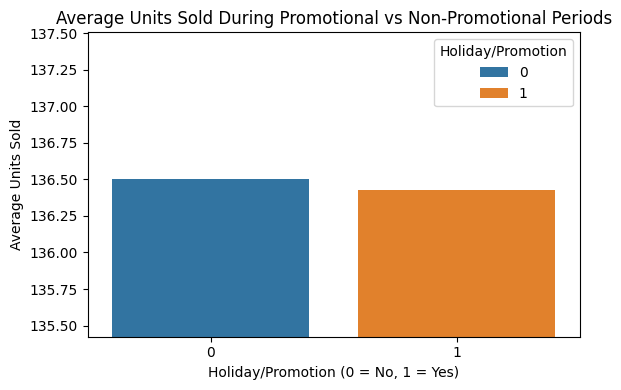

In [42]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Holiday/Promotion', y='Average Units Sold', data=promo_analysis, hue='Holiday/Promotion')
plt.title('Average Units Sold During Promotional vs Non-Promotional Periods')
plt.xlabel('Holiday/Promotion (0 = No, 1 = Yes)')
plt.ylabel('Average Units Sold')
plt.ylim(promo_analysis['Average Units Sold'].min() - 1, promo_analysis['Average Units Sold'].max() + 1)
plt.tight_layout()
plt.show()

> During Non-Holiday/Promotion average Units sold is slightly higher than the Holiday/Promotion period!   
Average price during Holiday/Promotion is slightly higher than the Non-Holiday/Promotion period!